<a href="https://colab.research.google.com/github/adarsh5691/dmdw-lab-18cse004/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab-6(Correlation Coefficient, Covarience and Normalization)









In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib','inline')
plt.style.use('seaborn-whitegrid')

In [2]:
url="https://raw.githubusercontent.com/adarsh5691/dmdw-lab-18cse004/main/student-mat.csv"

In [3]:
df=pd.read_csv(url)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [4]:
df=pd.read_csv(url)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [5]:
df1=df[['traveltime','studytime']]
df1.head()

,traveltime,studytime
0,2,2
1,1,2
2,1,2
3,1,3
4,1,2


In [6]:
x=df1['traveltime']
y=df1['studytime']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


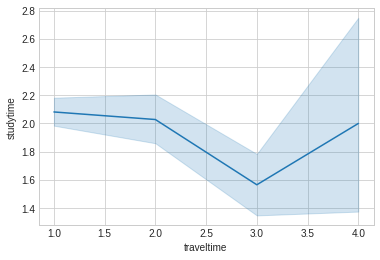

In [7]:
sns.lineplot(x,y, dashes=True)
plt.show()

In [8]:
from scipy.stats import norm

In [9]:
correlation=df1.corr()
print(correlation)

            traveltime  studytime
traveltime    1.000000  -0.100909
studytime    -0.100909   1.000000


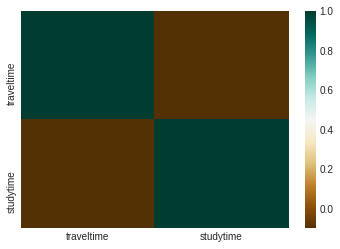

In [10]:
sns.heatmap(correlation,cmap='BrBG')
plt.show()


In [11]:
covar=df1.cov()
print(covar)

            traveltime  studytime
traveltime    0.486513  -0.059070
studytime    -0.059070   0.704324


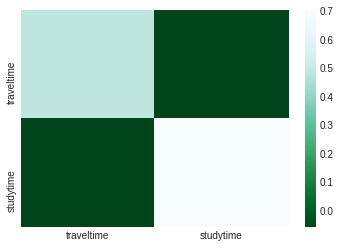

In [12]:
sns.heatmap(covar,cmap='BuGn_r')
plt.show()

In [13]:
# Normalization
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10


In [14]:
df.shape

(395, 33)

In [15]:
age=np.array(df['age'])
age

array([18, 17, 15, 15, 16, 16, 16, 17, 15, 15, 15, 15, 15, 15, 15, 16, 16,
       16, 17, 16, 15, 15, 16, 16, 15, 16, 15, 15, 16, 16, 15, 15, 15, 15,
       16, 15, 15, 16, 15, 15, 16, 15, 15, 15, 16, 15, 16, 16, 15, 15, 16,
       15, 15, 15, 15, 16, 15, 15, 15, 16, 16, 16, 16, 16, 15, 16, 15, 16,
       15, 15, 16, 15, 15, 16, 16, 15, 15, 16, 17, 16, 15, 15, 15, 15, 15,
       15, 16, 15, 16, 16, 16, 15, 16, 16, 15, 15, 16, 16, 16, 16, 16, 16,
       15, 15, 15, 15, 15, 16, 15, 16, 15, 16, 16, 15, 15, 16, 15, 16, 17,
       15, 15, 15, 16, 16, 16, 15, 15, 19, 18, 16, 15, 15, 17, 16, 15, 15,
       17, 16, 16, 15, 15, 16, 15, 16, 17, 15, 15, 15, 16, 15, 18, 16, 15,
       19, 17, 15, 17, 18, 16, 16, 17, 15, 16, 17, 17, 16, 16, 16, 16, 16,
       16, 16, 17, 16, 16, 17, 16, 17, 16, 17, 16, 16, 17, 17, 16, 17, 16,
       16, 17, 17, 16, 17, 17, 16, 16, 17, 17, 16, 17, 16, 16, 16, 17, 17,
       16, 17, 16, 16, 16, 17, 19, 17, 16, 18, 17, 17, 17, 18, 17, 17, 17,
       17, 16, 18, 16, 18

In [16]:
age=np.array(df['age'])
print("max age",max(age))
age=age.reshape(395,1)

max age 22


In [17]:
age=np.array(df['age'])
print("MIn age",min(age))
age=age.reshape(395,1)

MIn age 15


In [18]:
from scipy import stats
zscore=np.array(stats.zscore(age))
zscore=zscore[0:394]
zscore=zscore.reshape(2,197)

In [19]:
zscore

array([[ 1.02304645,  0.23837976, -1.33095364, -1.33095364, -0.54628694,
        -0.54628694, -0.54628694,  0.23837976, -1.33095364, -1.33095364,
        -1.33095364, -1.33095364, -1.33095364, -1.33095364, -1.33095364,
        -0.54628694, -0.54628694, -0.54628694,  0.23837976, -0.54628694,
        -1.33095364, -1.33095364, -0.54628694, -0.54628694, -1.33095364,
        -0.54628694, -1.33095364, -1.33095364, -0.54628694, -0.54628694,
        -1.33095364, -1.33095364, -1.33095364, -1.33095364, -0.54628694,
        -1.33095364, -1.33095364, -0.54628694, -1.33095364, -1.33095364,
        -0.54628694, -1.33095364, -1.33095364, -1.33095364, -0.54628694,
        -1.33095364, -0.54628694, -0.54628694, -1.33095364, -1.33095364,
        -0.54628694, -1.33095364, -1.33095364, -1.33095364, -1.33095364,
        -0.54628694, -1.33095364, -1.33095364, -1.33095364, -0.54628694,
        -0.54628694, -0.54628694, -0.54628694, -0.54628694, -1.33095364,
        -0.54628694, -1.33095364, -0.54628694, -1.3

In [20]:
#decimal NOrmalization
dn=[]
dn.append(age/pow(10,2) )
dn=np.array(dn)
dn

array([[[0.18],
        [0.17],
        [0.15],
        [0.15],
        [0.16],
        [0.16],
        [0.16],
        [0.17],
        [0.15],
        [0.15],
        [0.15],
        [0.15],
        [0.15],
        [0.15],
        [0.15],
        [0.16],
        [0.16],
        [0.16],
        [0.17],
        [0.16],
        [0.15],
        [0.15],
        [0.16],
        [0.16],
        [0.15],
        [0.16],
        [0.15],
        [0.15],
        [0.16],
        [0.16],
        [0.15],
        [0.15],
        [0.15],
        [0.15],
        [0.16],
        [0.15],
        [0.15],
        [0.16],
        [0.15],
        [0.15],
        [0.16],
        [0.15],
        [0.15],
        [0.15],
        [0.16],
        [0.15],
        [0.16],
        [0.16],
        [0.15],
        [0.15],
        [0.16],
        [0.15],
        [0.15],
        [0.15],
        [0.15],
        [0.16],
        [0.15],
        [0.15],
        [0.15],
        [0.16],
        [0.16],
        [0.16],
        

In [21]:
# Calculate min-max Normalization
age=np.array(df['age'])
print("max age",max(age))
age=age.reshape(395,1)

max age 22


In [22]:
age=np.array(df['age'])
print("min age",min(age))
age=age.reshape(395,1)

min age 15
